Primero vamos a realizar unas operaciones sobre visualizació de datos. Para ellos cargaremos el dataset de flores iris-setosa, y realizaremos visualizaciones sobre el dataset cargado.

In [1]:
import io
import pandas as pd
from sklearn.datasets import load_iris
from google.colab import files

#Librerias para graficos
import matplotlib.pyplot as plt
import seaborn as sns

#Librerias para correlaciones
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import pearsonr

import numpy as np


In [2]:
# Cargamos archivo Iris
uploaded = files.upload()
iris = pd.read_csv(io.BytesIO(uploaded['Iris.csv']), sep=";")

Saving Iris.csv to Iris.csv


In [3]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


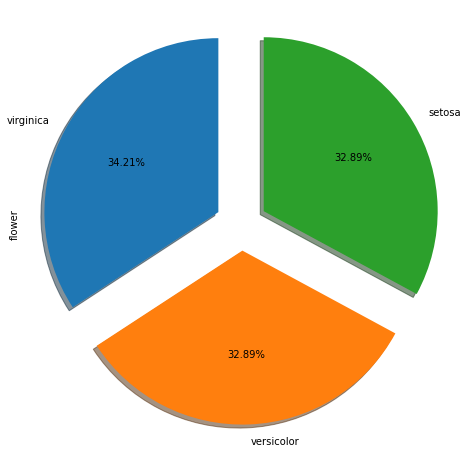

In [4]:
#Gráficos de Tarta
#Ejercicio 1: Realiza un grafico de tarta con las diferentes categorias del tipo de flor
#Además debe de aparecer en cada porcion de la tarta, el valor en porcentaje con 2 decimales
#Añadele el titulo "Distribución por tipo de flor"
#Utilizaremos la función pie de matplotlib https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html

#Guarda la imagen en formato jpg con el nombre "bloque3a_ejercicio1.jpg"
total_valores = iris['flower'].value_counts()
total_valores.plot.pie(explode=[0.15,0.15,0.15], autopct='%1.2f%%',shadow=True,figsize=(10,8), startangle=90)

plt.savefig('bloque3a_ejercicio1.jpg')

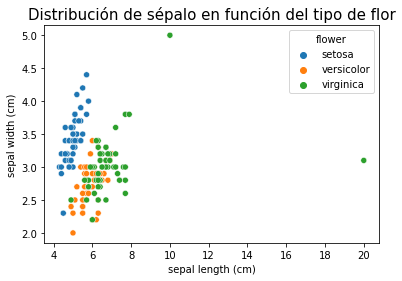

In [5]:
# Nubes de puntos
#Ejercicio 2 - Dibuja la nube de puntos para las columnas sepal length y sepal width. Pinta el punto segun el tipo de flor.
#Añadele al grafico el titulo "Distribución de sépalo en función del tipo de flor" y un tamaño de fuente de 15
#Establece un tamaño de figura 10x5
#Utiliza el metodo scatterplot de seaborn: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

#Guarda la imagen en formato jpg con el nombre "bloque3a_ejercicio2.jpg"
sns.scatterplot(data=iris, x='sepal length (cm)', y='sepal width (cm)', hue='flower').set_title("Distribución de sépalo en función del tipo de flor", fontsize=15)
plt.savefig("bloque3a_ejercicio2.jpg")

In [ ]:
# Gráficos de líneas
#Para este ejercicio se proporciona un fichero con la columna "date_start" que fecha y hora de un evento especifico.
#Dibuja un lineplot que muestre las ocurrencias por fecha (debes de eliminar la hora de los datos)
#Ponle el titulo "Frecuencia de un evento por fecha" con un tamaño de fuente de 20
#Ponle al eje Y el titulo "Frecuencia" con un tamaño de fuente de 15
#Ponle al eje X el titulo "Fecha" con un tamaño de fuente de 15
#Haz que aparezcan todas las fechas del dataset en el eje X
#Nota: Usa el metodo lineplot de seaborn https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot
#Guarda la imagen en formato jpg con el nombre "bloque3a_ejercicio3.jpg"


#Cargamos primero el dataset proporcionado "dates.csv"
uploaded = files.upload()
dates = pd.read_csv(io.BytesIO(uploaded['dates.csv']), sep=";")

Saving dates.csv to dates.csv


In [ ]:
dates_copy = dates.copy()
dates_copy.head()

,date_start
0,2020-02-26 14:51:47.974000+00:00
1,2020-02-26 14:53:01.841000+00:00
2,2020-02-26 14:53:01.841000+00:00
3,2020-02-26 14:53:01.841000+00:00
4,2020-02-26 14:53:01.841000+00:00


In [ ]:
dates_copy = pd.to_datetime(dates_copy['date_start']).dt.date
dates_copy.head(5)

0    2020-02-26
1    2020-02-26
2    2020-02-26
3    2020-02-26
4    2020-02-26
Name: date_start, dtype: object

In [ ]:
frecuencias = dates_copy.value_counts()
frecuencias.head(5)

2020-03-20    5943
2020-03-21    5620
2020-03-27    5538
2020-03-23    5298
2020-03-26    5195
Name: date_start, dtype: int64

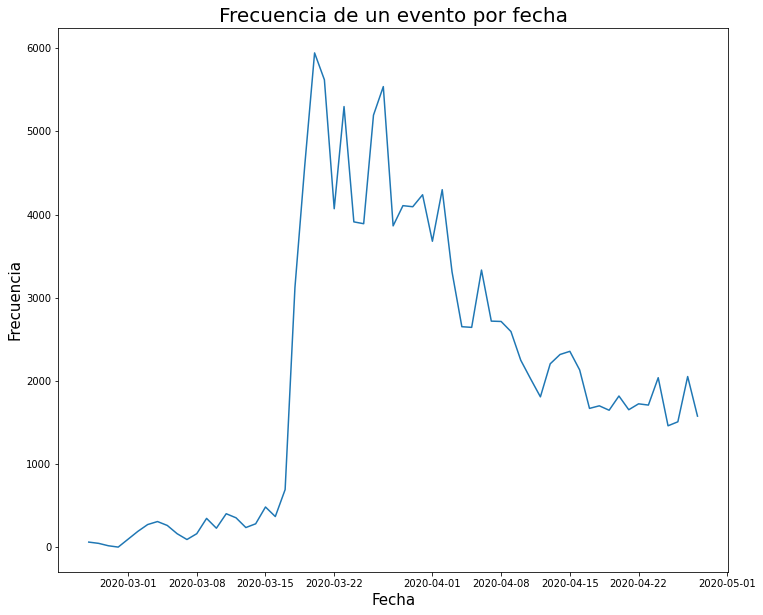

In [ ]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
ax.set_xlabel(xlabel='Fecha', size=15)
ax.set_ylabel(ylabel='Frecuencia', size=15)
sns.lineplot(data=frecuencias).set_title("Frecuencia de un evento por fecha", fontsize=20)
plt.savefig("bloque3a_ejercicio3.jpg")

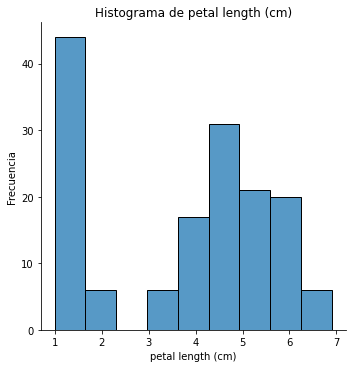

In [12]:
# Histogramas
# Calcula el histograma de la variable petal length
#Añadele el titulo "Histograma de petal length (cm)"
# Cambia el nombre del eje Y por "Frecuencia"
#Presta especial atención en lo que devuelve la clase displot(devuelve un FacetGrid)

#Guarda la imagen en formato jpg con el nombre "bloque3a_ejercicio4.jpg"

sns.displot(data=iris, x="petal length (cm)")

plt.title("Histograma de petal length (cm)")
plt.ylabel("Frecuencia")
plt.savefig("bloque3a_ejercicio4.jpg")

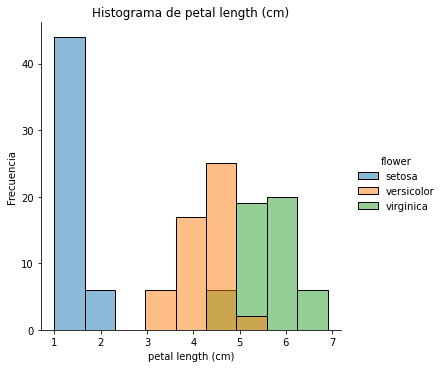

In [76]:
# Histogramas
# Calcula el histograma de la variable petal length
# Añadele el titulo "Histograma de petal length (cm)"
# Cambia el nombre del eje Y por "Frecuencia"
# Presta especial atención en lo que devuelve la clase displot(devuelve un FacetGrid)
# Representa en el mismo histograma segun el tipo de flor.
#Guarda la imagen en formato jpg con el nombre "bloque3a_ejercicio5.jpg"

#sns.displot(x=iris['flower'].value_counts().index.tolist(), y=[total_valores[i] for i in range(3) ])

sns.displot(data=iris, x="petal length (cm)", hue="flower")
plt.title("Histograma de petal length (cm)")
plt.ylabel("Frecuencia")
plt.savefig("bloque3a_ejercicio5.jpg")

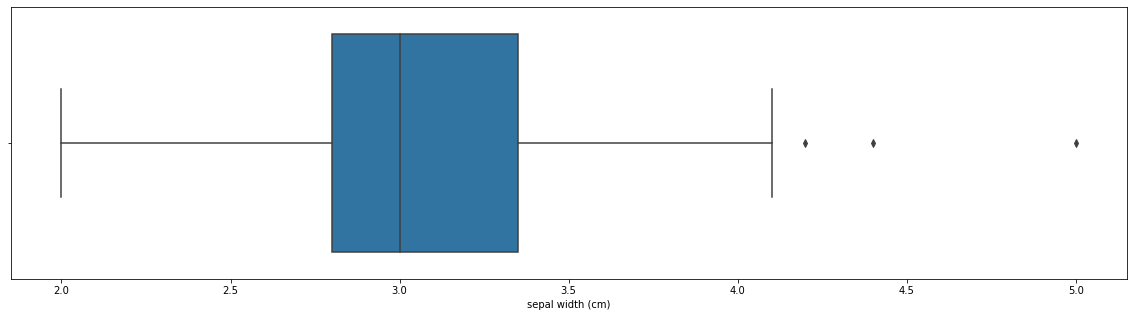

In [77]:
#Calcular el Diagrama de cajas y bigotes en función de la variable sepal_width con un tamaño de figura 20,5 y el titulo "Diagrama de cajas y bigotes"

#PISTA: ¿Nos interesa plotear los diagramas en función de alguna otra variable? Seria interesante utilizar el tipo de flor, para ver como
#se comporta la variable sepal width en función de la categoria. ¿Existe alguna diferencia entre las distribuciones segun el tipo de flor?
#Creamos el diagrama de cajas y bigotes en función de la categoria
#Para eso usamos la funcion boxplot https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot
#Guarda la imagen en formato jpg con el nombre "bloque3a_ejercicio6.jpg"

a4_dims = (20, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x=iris["sepal width (cm)"])

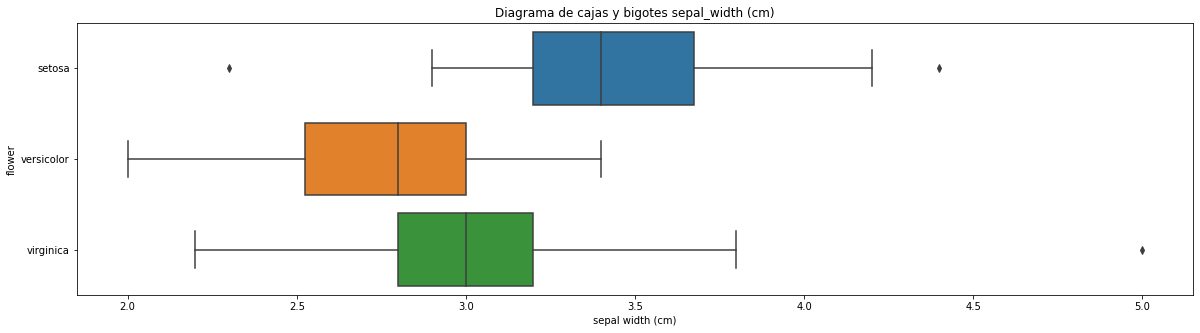

In [74]:
#¿Nos interesa plotear los diagramas en función de alguna otra variable? Seria interesante utilizar el tipo de flor, para ver como
#se comporta la variable sepal width en función de la categoria.

a4_dims = (20, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x=iris["sepal width (cm)"], y = iris["flower"])
plt.title("Diagrama de cajas y bigotes sepal_width (cm)")
plt.savefig("bloque3a_ejercicio6.jpg")

¿Existe alguna diferencia entre las distribuciones segun el tipo de flor?
Parece que la anchura mediana del tipo versicolor se concentra más en torno a 2.75 cm, frente a virgínica que se concentra en 3. En cuanto a la setosa, parece concentrarse su anchura mediana del sépalo en torno a 3.4 cm.

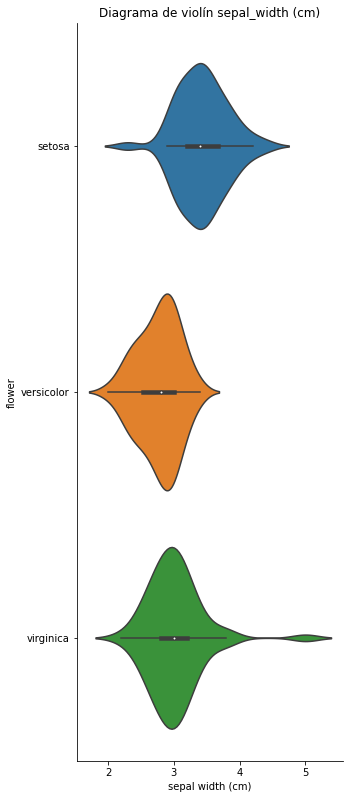

In [72]:
#Calcular el diagrama de violin para la misma variable, con un tamaño de figura 10x5 y el titulo "Diagrama de violin"

#¿Que diferencia veis en funcion del diagrama de bigotes? En realidad son practicamente iguales, solo que el diagrama de violin
# utiliza un Kernel density estimation(KDE) KDE en estadistica es una forma no paramétrica para estimar la función de densidad de probabilidad 
# de una variable aleatoria. (muy relacionado con los rangos intercuartiles y un histograma)
#HAy que tener en cuenta, que este kernel se ve afectado por el numero de muestras, y para pocas muestras, la distribucion tendra mas ruido
#Ejemplo para 10 muestras, donde tenemos por ejemplo outliers saldra algo muy raro, pero cuanto mas muestras cojamos mas representativa será
#Guarda la imagen en formato jpg con el nombre "bloque3a_ejercicio7.jpg"

f=sns.catplot(data=iris, x="sepal width (cm)", y = "flower", kind = "violin")
f.fig.set_figwidth(5)
f.fig.set_figheight(12)
plt.title("Diagrama de violín sepal_width (cm)")
plt.savefig("bloque3a_ejercicio7.jpg")

In [ ]:
#Que Diferencias encuentras entre ambos graficos ? ¿Cual prefieres? Contesta a la pregunta en los comentarios del fichero .py a continuación del ejercicio anterior

#Que Diferencias encuentras entre ambos graficos ? ¿Cual prefieres? Contesta a la pregunta en los comentarios del fichero .py a continuación del ejercicio anterior

Respuesta:

Dependería del caso concreto, si se tuviese un número de muestras muy grande, al hacer una estimación de la función de densidad de probabilidad, podría proporcionar una aproximación lo suficientemente precisa, y por tanto, el diagrama de violín sería bastante explícito, elegante, y atractivo, para ser usado. En términos generales preferiría el de caja, pero si se dan ciertas condiciones, el de violín.

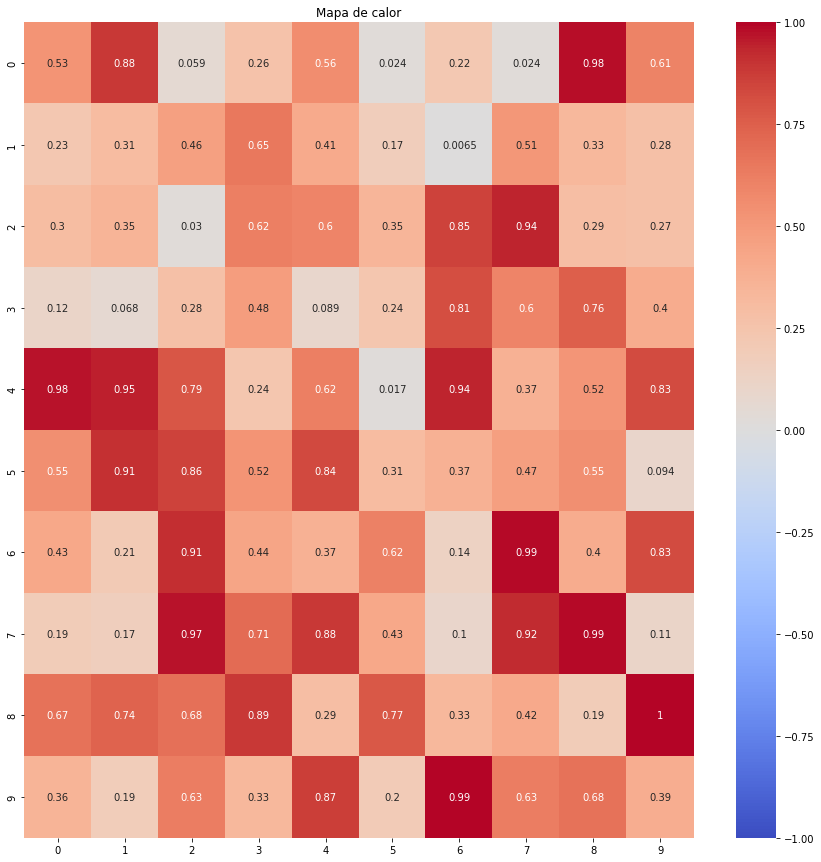

In [71]:
# En este ejercicio, vamos a dibujar un mapa de calor, para ello, crea primero una matriz 10x10 con valores aleatorios entre 0 y 1
#Establece un tamaño de figura 15x15
#Utiliza el mapa de colores "coolwarm"
#Establece el rango de colores entre los valores -1 y 1 ¿Qué observas al establecer este rango?
#Haz que aparezca en cada celda el valor ademas del color

#Guarda la imagen en formato jpg con el nombre "bloque3a_ejercicio8.jpg"

matrix_aleatoria = np.random.rand(10, 10)
a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(matrix_aleatoria, vmin=-1, vmax=1, cmap="coolwarm", annot=True)
plt.title("Mapa de calor")
plt.savefig("bloque3a_ejercicio8.jpg")

Establece el rango de colores entre los valores -1 y 1 ¿Qué observas al establecer este rango?

Respuesta:

Como todos los valores de la matriz son positivos, no se mostrará ninguna celda del color correspondiente a los números negativos. Es decir, no habrán celdas de color azul.  